In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
reviews = pd.read_pickle('all_data_df_large.pkl')

In [28]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200152 entries, 1051127 to 67426
Data columns (total 13 columns):
reviewerID                200152 non-null object
asin                      200152 non-null object
reviewerName              198446 non-null object
helpful                   200152 non-null object
reviewText                200152 non-null object
overall                   200152 non-null float64
summary                   200152 non-null object
unixReviewTime            200152 non-null int64
reviewTime                200152 non-null datetime64[ns]
category                  200152 non-null object
HelpfulnessNumerator      200152 non-null float64
HelpfulnessDenominator    200152 non-null float64
Helpfulness               77367 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(1), object(7)
memory usage: 21.4+ MB


In [16]:
reviews['reviewTime'] =  pd.to_datetime(reviews['reviewTime'], format='%M %d, %Y')

In [17]:
reviews[['HelpfulnessNumerator','HelpfulnessDenominator']] = pd.DataFrame(reviews.helpful.values.tolist(), index= reviews.index)

In [18]:
reviews_numertical = reviews.drop(['reviewerName','summary','reviewText'], 1)

In [20]:
reviews['HelpfulnessNumerator'] = reviews.HelpfulnessNumerator.astype(float)
reviews['HelpfulnessDenominator'] = reviews.HelpfulnessDenominator.astype(float)
reviews['Helpfulness'] = reviews.HelpfulnessNumerator/reviews.HelpfulnessDenominator
#reviews_numerical['Time'] = reviews_numerical.Time.astype(float)
#reviews_numerical['Score'] = reviews_numerical.Score.astype(float)

In [21]:
reviews

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,category,HelpfulnessNumerator,HelpfulnessDenominator,Helpfulness
1051127,ANVY8NSVZZXAR,B007MJSZDQ,Ralz,"[0, 0]","Batteries came in as duds, they offered to rep...",1.0,Batteries don't work,1388448000,2013-01-31 00:12:00,Video_Games,0.0,0.0,NaN
353052,A2R5XK4IBTTVY8,B000J54YU8,David Hunt,"[1, 2]",This game is hours of fun 3 games to choose fr...,5.0,Hours of fun,1171756800,2007-01-18 00:02:00,Video_Games,1.0,2.0,0.500000
109692,A3W3WM1AM36LMI,B00005S8J2,Mud Guru,"[7, 9]",All right. One thing must be kept straight: T...,4.0,Oh my Mud,1062460800,2003-01-02 00:09:00,Video_Games,7.0,9.0,0.777778
646467,A35NVSKRCH3D25,B002FL50UM,Steve,"[4, 5]",I ordered this game and I installed it on my W...,1.0,Deus Ex Complete...Issues on Windows 7 64 bit ...,1315353600,2011-01-07 00:09:00,Video_Games,4.0,5.0,0.800000
196860,A1NAYHI6X373U7,B0001CJCG0,Pete the Iguana,"[3, 4]",...don't buy this game. While many people try ...,2.0,If you liked the first trilogy at all...,1213833600,2008-01-19 00:06:00,Video_Games,3.0,4.0,0.750000
518508,AQB32YTYWT5FL,B001AZFSFQ,jose enriquez,"[0, 0]",this is a great game sofar the best for me i ...,5.0,the best,1237334400,2009-01-18 00:03:00,Video_Games,0.0,0.0,NaN
167573,A1MRPX3RM48T2I,B000099T2E,Winter,"[0, 0]",The Ratchet & Clank Series has come a long way...,4.0,Fun Cranked Up a Notch,1320278400,2011-01-03 00:11:00,Video_Games,0.0,0.0,NaN
748045,A3TU70AAACLB3A,B003C1ODMU,Raul,"[0, 0]",Pretty straight forward was just as described ...,5.0,Just as described and in working order,1371427200,2013-01-17 00:06:00,Video_Games,0.0,0.0,NaN
82822,A2N77O950DAXR,B00005J37L,Piotr J.,"[0, 2]",This game is a pathetic waste of money. It doe...,1.0,PATHETIC!!!!,1001894400,2001-01-01 00:10:00,Video_Games,0.0,2.0,0.000000
119715,A4BBFRN1ONLYP,B00006352W,"NS ""Namita""","[1, 1]",My daughters- five and six year old have reall...,4.0,educational and really holds their attention f...,1123286400,2005-01-06 00:08:00,Video_Games,1.0,1.0,1.000000


In [25]:
# Drop the abnormal helpness which is larger than 1 
reviews= reviews.drop(reviews[reviews['Helpfulness']> 1].index)

In [30]:
reviews_numerical = reviews.drop(['reviewerName','reviewText','summary','HelpfulnessNumerator','HelpfulnessDenominator','helpful'], 1)

In [32]:
reviews_numerical.describe()

,overall,unixReviewTime,Helpfulness
count,200152.000000,2.001520e+05,77367.000000
mean,4.093074,1.349158e+09,0.724446
std,1.336674,6.677117e+07,0.370314
min,1.000000,8.942400e+08,0.000000
25%,4.000000,1.337731e+09,0.500000
50%,5.000000,1.369786e+09,1.000000
75%,5.000000,1.389744e+09,1.000000
max,5.000000,1.406074e+09,1.000000


In [33]:
reviews_numerical

,reviewerID,asin,overall,unixReviewTime,reviewTime,category,Helpfulness
1051127,ANVY8NSVZZXAR,B007MJSZDQ,1.0,1388448000,2013-01-31 00:12:00,Video_Games,NaN
353052,A2R5XK4IBTTVY8,B000J54YU8,5.0,1171756800,2007-01-18 00:02:00,Video_Games,0.500000
109692,A3W3WM1AM36LMI,B00005S8J2,4.0,1062460800,2003-01-02 00:09:00,Video_Games,0.777778
646467,A35NVSKRCH3D25,B002FL50UM,1.0,1315353600,2011-01-07 00:09:00,Video_Games,0.800000
196860,A1NAYHI6X373U7,B0001CJCG0,2.0,1213833600,2008-01-19 00:06:00,Video_Games,0.750000
518508,AQB32YTYWT5FL,B001AZFSFQ,5.0,1237334400,2009-01-18 00:03:00,Video_Games,NaN
167573,A1MRPX3RM48T2I,B000099T2E,4.0,1320278400,2011-01-03 00:11:00,Video_Games,NaN
748045,A3TU70AAACLB3A,B003C1ODMU,5.0,1371427200,2013-01-17 00:06:00,Video_Games,NaN
82822,A2N77O950DAXR,B00005J37L,1.0,1001894400,2001-01-01 00:10:00,Video_Games,0.000000
119715,A4BBFRN1ONLYP,B00006352W,4.0,1123286400,2005-01-06 00:08:00,Video_Games,1.000000


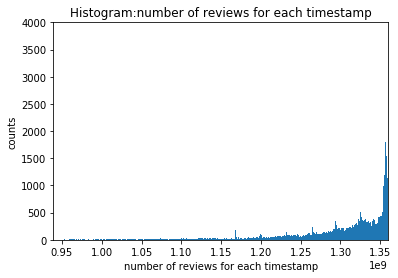

In [37]:
# Construct time trend
# plot histogram
reviews_numerical.hist(column = 'unixReviewTime',grid = False,bins = 1000)
plt.title('Histogram:number of reviews for each timestamp')
#plt.yscale('log',nonposy = 'clip')
plt.axis([9.393408e+08 , 1.360000e+09,0,4000])
plt.xlabel('number of reviews for each timestamp')
plt.ylabel('counts')
plt.show()

# customoer vs. # of product they reviews

In [42]:
userId_grouped = reviews_numerical.groupby('asin')
uniqueId = list(reviews_numerical['asin'].unique())
n_product_reviewed = []
for ID in uniqueId:
    user_indivisual = userId_grouped.get_group(ID)
    n_product_reviewed.append(len(user_indivisual.index))
user_df = pd.DataFrame({'Id':uniqueId,'N_products':n_product_reviewed})

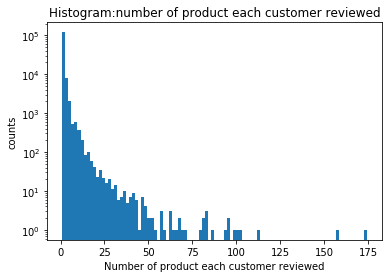

In [43]:
# Construct number of product each customer reviewed
# plot histogram
user_df.hist(column = 'N_products',grid = False,bins = 100)
plt.title('Histogram:number of product each customer reviewed')
plt.yscale('log',nonposy = 'clip')
plt.xlabel('Number of product each customer reviewed')
plt.ylabel('counts')
plt.show()

In [44]:
user_df.describe()

,N_products
count,131541.000000
mean,1.521594
std,2.221164
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,174.000000


# Product v.s. # of reviews

In [46]:
product_grouped = reviews_numerical.groupby('asin')
unique_product = list(reviews_numerical['asin'].unique())
n_reviews_received = []
average_score = []
for product in unique_product:
    product_individual = product_grouped.get_group(product)
    n_reviews_received.append(len(product_individual.index))
    average_score.append(product_individual['overall'].mean())
product_df = pd.DataFrame({'Id':unique_product,'N_reviews':n_reviews_received,'Avg_score':average_score})

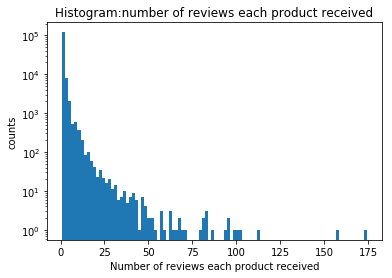

In [47]:
# Construct number of reviews each product received
# plot histogram
product_df.hist(column = 'N_reviews',grid = False,bins = 100)
plt.title('Histogram:number of reviews each product received')
plt.yscale('log',nonposy = 'clip')
plt.xlabel('Number of reviews each product received')
plt.ylabel('counts')
plt.show()

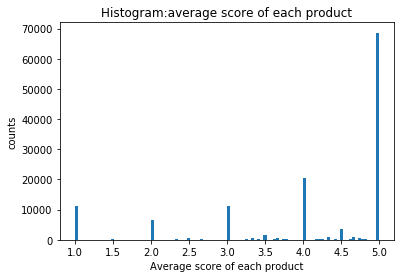

In [48]:
# Construct average score of each product
# plot histogram
product_df.hist(column = 'Avg_score',grid = False,bins = 100)
plt.title('Histogram:average score of each product')
#plt.yscale('log',nonposy = 'clip')
plt.xlabel('Average score of each product')
plt.ylabel('counts')
plt.show()

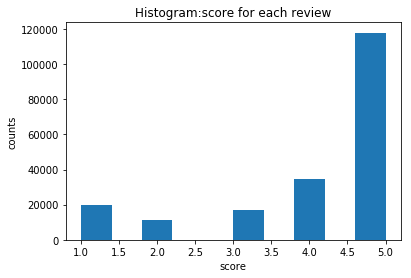

In [50]:
# Construct score distribution
score = reviews_numerical['overall'].tolist()
# plot histogram
reviews_numerical.hist(column = 'overall',grid = False)
#plt.hist(score,100,density = True,alpha = 0.75)
plt.title('Histogram:score for each review')
#plt.yscale('log',nonposy = 'clip')
plt.xlabel('score')
plt.ylabel('counts')
plt.show()

In [51]:
n_no_vote = reviews_numerical['Helpfulness'].isna().sum()
print('There is %d in all reviews that has no helpfulness vote at all'%n_no_vote)

There is 122785 in all reviews that has no helpfulness vote at all


In [55]:
helpness_df = reviews.dropna(subset=['Helpfulness'])

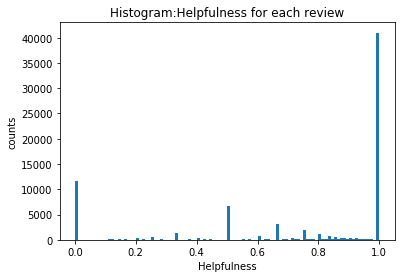

In [56]:
# Construct helpness distribution
helpfulness = helpness_df['Helpfulness'].tolist()
# plot histogram
helpness_df.hist(column = 'Helpfulness',grid = False,bins = 100)
plt.title('Histogram:Helpfulness for each review')
#plt.yscale('log',nonposy = 'clip')
plt.xlabel('Helpfulness')
plt.ylabel('counts')
plt.show()

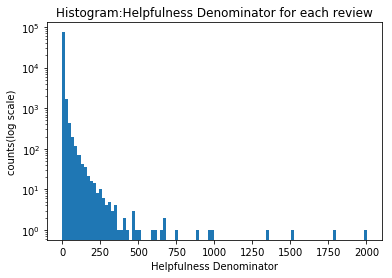

In [57]:
# Construct Helpfulness Denominator distribution
helpfulnessDenominator = helpness_df['HelpfulnessDenominator'].tolist()
# plot histogram
helpness_df.hist(column = 'HelpfulnessDenominator',grid = False,bins = 100)
plt.title('Histogram:Helpfulness Denominator for each review')
plt.yscale('log',nonposy = 'clip')
plt.xlabel('Helpfulness Denominator')
plt.ylabel('counts(log scale)')
plt.show()

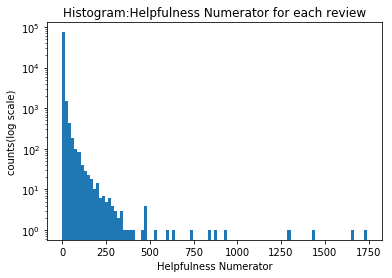

In [58]:
# Construct Helpfulness Numerator distribution
helpfulnessNumerator = helpness_df['HelpfulnessNumerator'].tolist()
# plot histogram
#fig = plt.figure()
#ax = fig.add_subplot(111)
#plt.hist(helpfulnessNumerator,100,density = True,alpha = 0.75)
helpness_df.hist(column = 'HelpfulnessNumerator',grid = False,bins = 100)
plt.title('Histogram:Helpfulness Numerator for each review')
plt.yscale('log',nonposy = 'clip')
plt.xlabel('Helpfulness Numerator')
plt.ylabel('counts(log scale)')
plt.show()